<a href="https://colab.research.google.com/github/HaEunMok/ML/blob/main/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4%5D_pima_classification_baseline_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 최적의 모델과 파라미터 값 찾는 방법
1. 랜덤값 고정
2. 최적의 max_depth
3. GridSearchCV
4. RandomSearchCV


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML DL/diabetes_feature.csv")
df.shape

(768, 16)

In [4]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [7]:
y = df['Outcome']
y.shape

(768,)

In [8]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [10]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [11]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

### 최적의 max_depth 값 찾기

In [12]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [13]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12),
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]} #max_features : 어떤 것을 사용할 것인지
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2) #cv : data set을 몇개로 나눌 것인지
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [14]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [15]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [16]:
clf.best_score_

0.8664934026389444

In [17]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.016958,0.006833,0.008080,0.003423,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.030216,0.008904,0.017535,0.003011,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.027558,0.007394,0.016363,0.004708,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.012960,0.003687,0.009466,0.005461,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.019455,0.003857,0.013843,0.003961,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [18]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [19]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [20]:
model

DecisionTreeClassifier(random_state=42)

In [21]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 9,  3,  7, 16, 11,  4,  8, 19, 11, 10])

In [22]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [23]:
param_distributions = {"max_depth" :max_depth,
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 9,  3,  7, 16, 11,  4,  8, 19, 11, 10]),
 'max_features': array([0.86653335, 0.70563661, 0.84553409, 0.70649953, 0.7793557 ,
        0.74394739, 0.83362144, 0.91533211, 0.80042619, 0.91799365,
        0.80124215, 0.8795061 , 0.98823397, 0.742009  , 0.98684018,
        0.72419383, 0.89879596, 0.91944651, 0.74289344, 0.92893651,
        0.82193535, 0.89117633, 0.79810577, 0.81535561, 0.79811526,
        0.74891915, 0.95583809, 0.80001445, 0.8797598 , 0.79211502,
        0.86444135, 0.70914227, 0.71108515, 0.74227509, 0.77950072,
        0.97620057, 0.85542183, 0.75855003, 0.8666936 , 0.7716383 ,
        0.88712735, 0.94308967, 0.991015  , 0.82717559, 0.95861167,
        0.72518555, 0.77884568, 0.80968257, 0.8492524 , 0.96581714,
        0.79620289, 0.70277564, 0.9990299 , 0.86263257, 0.93116181,
        0.70960626, 0.9499193 , 0.79251556, 0.96157349, 0.83662258,
        0.77326553, 0.72872221, 0.9430994 , 0.82643589, 0.95853305,
        0.7677071 , 0.85317109, 0.750

In [24]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 9,  3,  7, 16, 11,  4,  8, 19, 11, 10]),
                                        'max_features': array([0.86653335, 0.70563661, 0.84553409, 0.70649953, 0.7793557 ,
       0.74394739, 0.83362144, 0.91533211, 0.80042619, 0.91799365,
       0.80124215, 0.8795061 , 0.98823397, 0.742009  , 0.98684018,
       0.72...
       0.90365392, 0.8054165 , 0.85970693, 0.96837042, 0.82846153,
       0.79698659, 0.79044489, 0.97464598, 0.9413995 , 0.97400828,
       0.80870553, 0.89323262, 0.86766747, 0.82910246, 0.82137758,
       0.78036438, 0.81848341, 0.72645926, 0.71605527, 0.91932993,
       0.86952212, 0.83237414, 0.91874159, 0.98066814, 0.84130471,
       0.97886226, 0.9794489 , 0.86321428, 0.96765466, 0.91088423]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [25]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.862632569275808, 'max_depth': 10}

In [26]:
clf.best_score_

0.8713847794215648

In [27]:
clf.score(X_test, y_test)

0.8571428571428571

In [28]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
386,0.013446,0.002472,0.005752,0.003478,4,0.792115,10,"{'min_samples_split': 4, 'max_features': 0.792...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
924,0.014225,0.003023,0.005711,0.003447,4,0.866533,10,"{'min_samples_split': 4, 'max_features': 0.866...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
71,0.006537,0.001221,0.003017,0.000202,6,0.898796,9,"{'min_samples_split': 6, 'max_features': 0.898...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
24,0.014916,0.002686,0.004249,0.001060,4,0.862633,10,"{'min_samples_split': 4, 'max_features': 0.862...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
891,0.015837,0.006688,0.007961,0.004457,4,0.818483,10,"{'min_samples_split': 4, 'max_features': 0.818...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


# Randomforest

In [29]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(random_state=42)

## 학습과 예측하기

In [30]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
feature_names = X_train.columns.tolist()

In [32]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [52]:
#from sklearn.tree import plot_tree

#plt.figure(figsize=(15, 15))
#tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

## 정확도(Accuracy) 측정하기

In [35]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28
# RF: 20
abs(y_predict - y_test).sum()

20

In [36]:
# accuracy score를 구합니다.
# DT: 0.818
# RF : 0.870
accuracy_score(y_test, y_predict) * 100

87.01298701298701

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100
# 데이터가 변하면 정확도가 달라질 수 있다.

87.01298701298701

<Axes: >

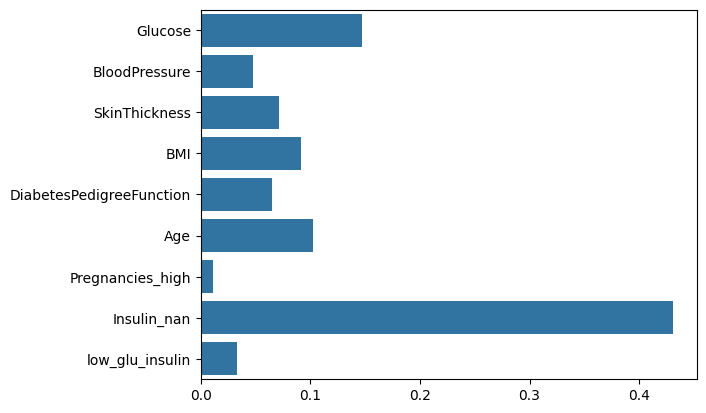

In [38]:
feature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)


##Random Forest

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

## Bagging


In [40]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

## Boosting

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [43]:
(y_predict != y_test).sum()

20

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8701298701298701

<Axes: >

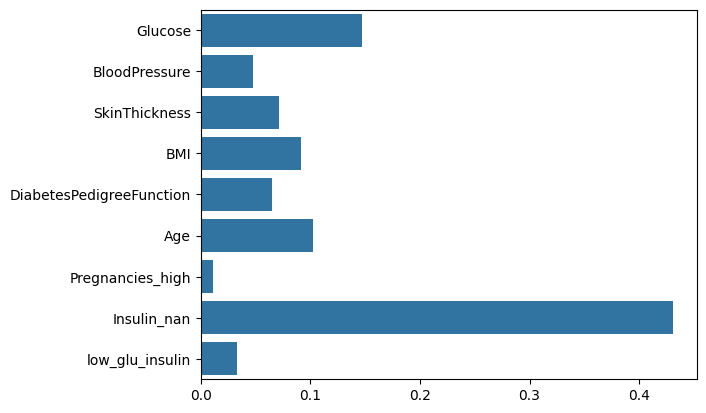

In [45]:
feature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)

# Gradient Boosting algorithm

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [47]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [48]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

<Axes: >

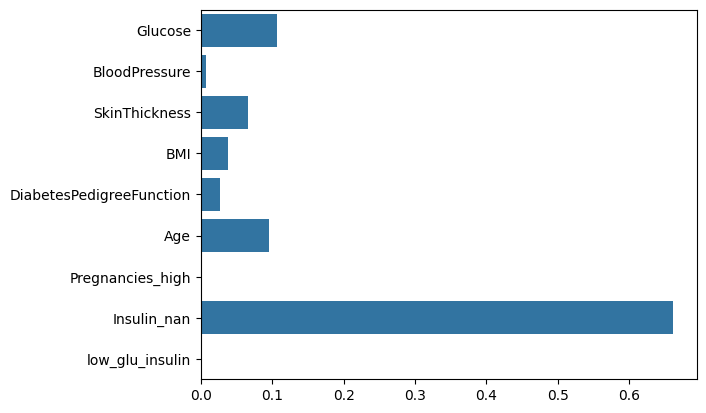

In [49]:
eature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)

In [50]:
(y_predict != y_test).sum()

20

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8701298701298701